In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [3]:
df=pd.read_csv("/kaggle/input/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [4]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [5]:
df_Australia=df[df['country']=='Australia']

#### We will remove irrelevant variables and avoid model cheating.

In [6]:
df_australia=df_Australia.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [7]:
df_australia.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
9,Australia,Apartment,Unfurnished,4648,1483250,1966,5,2,0,1
24,Australia,Farmhouse,Fully-Furnished,4358,1392975,2006,6,3,0,1
33,Australia,Apartment,Semi-Furnished,2843,910130,1977,7,4,1,0
60,Australia,Studio,Semi-Furnished,5623,1802281,2017,8,5,0,0
70,Australia,Apartment,Semi-Furnished,2170,692107,2010,3,3,0,1


In [8]:
df_australia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15442 entries, 9 to 199993
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15442 non-null  object
 1   property_type       15442 non-null  object
 2   furnishing_status   15442 non-null  object
 3   property_size_sqft  15442 non-null  int64 
 4   price               15442 non-null  int64 
 5   constructed_year    15442 non-null  int64 
 6   rooms               15442 non-null  int64 
 7   bathrooms           15442 non-null  int64 
 8   garage              15442 non-null  int64 
 9   garden              15442 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [9]:
df_australia.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15442.000000,1.544200e+04,15442.000000,15442.000000,15442.000000,15442.000000,15442.000000
mean,3213.207875,1.028264e+06,1991.430385,4.478694,2.725618,0.506670,0.497539
std,1610.375292,5.153283e+05,18.611176,2.294172,1.819816,0.499972,0.500010
min,400.000000,1.236230e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1829.000000,5.854878e+05,1975.000000,2.000000,1.000000,0.000000,0.000000
50%,3216.500000,1.030112e+06,1991.000000,4.000000,2.000000,1.000000,0.000000
75%,4600.000000,1.471910e+06,2008.000000,6.000000,4.000000,1.000000,1.000000
max,6000.000000,1.924825e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [10]:
df_australia.shape

(15442, 10)

In [11]:
df_australia.value_counts()

country    property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Australia  Apartment      Fully-Furnished    406                 127132   2001              5      5          0       1         1
           Studio         Unfurnished        4690                1505196  1975              2      2          1       0         1
                                             4974                1593520  1980              1      1          1       0         1
                                             4975                1591867  2017              8      8          1       0         1
                                             4976                1587759  1963              7      2          1       0         1
                                                                                                                               ..
           Farmhouse      Unfurnished        5627                1804667  1998              2  

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999984         -0.010358  0.003846   
price                         0.999984  1.000000         -0.010389  0.003883   
constructed_year             -0.010358 -0.010389          1.000000 -0.010941   
rooms                         0.003846  0.003883         -0.010941  1.000000   
bathrooms                    -0.009918 -0.009878         -0.005472  0.622287   
garage                        0.004807  0.004888         -0.010045  0.011444   
garden                        0.000375  0.000395         -0.004688 -0.001118   

                    bathrooms    garage    garden  
property_size_sqft  -0.009918  0.004807  0.000375  
price               -0.009878  0.004888  0.000395  
constructed_year    -0.005472 -0.010045 -0.004688  
rooms                0.622287  0.011444 -0.001118  
bathrooms            1.000000  0.005321 -0.004692  
garage               0.005321  1.000000 -0.0100

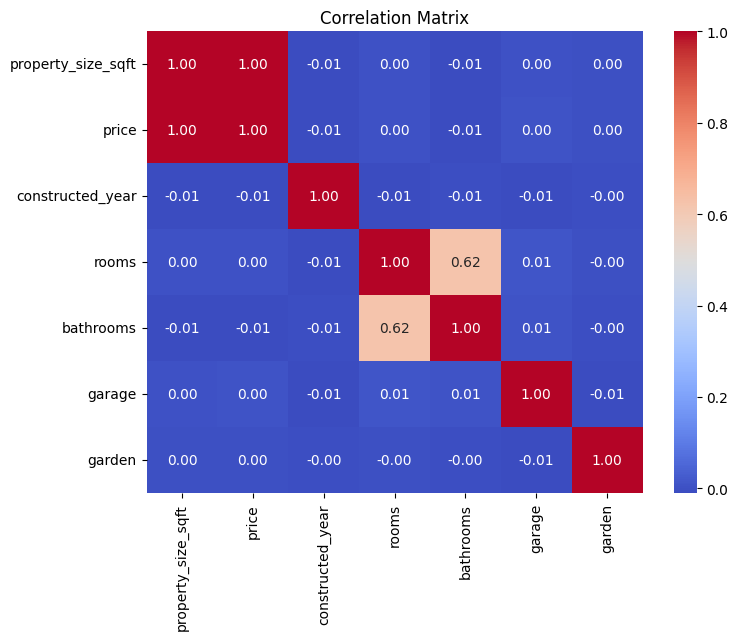

In [12]:
correlation_matrix = df_australia.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [13]:
df_Australia=pd.get_dummies(df_australia, columns=['property_type', 'furnishing_status'])
df_Australia.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
9,Australia,4648,1483250,1966,5,2,0,1,True,False,False,False,False,False,False,False,True
24,Australia,4358,1392975,2006,6,3,0,1,False,True,False,False,False,False,True,False,False
33,Australia,2843,910130,1977,7,4,1,0,True,False,False,False,False,False,False,True,False
60,Australia,5623,1802281,2017,8,5,0,0,False,False,False,True,False,False,False,True,False
70,Australia,2170,692107,2010,3,3,0,1,True,False,False,False,False,False,False,True,False


In [14]:
df_Australia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15442 entries, 9 to 199993
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15442 non-null  object
 1   property_size_sqft                 15442 non-null  int64 
 2   price                              15442 non-null  int64 
 3   constructed_year                   15442 non-null  int64 
 4   rooms                              15442 non-null  int64 
 5   bathrooms                          15442 non-null  int64 
 6   garage                             15442 non-null  int64 
 7   garden                             15442 non-null  int64 
 8   property_type_Apartment            15442 non-null  bool  
 9   property_type_Farmhouse            15442 non-null  bool  
 10  property_type_Independent House    15442 non-null  bool  
 11  property_type_Studio               15442 non-null  bool  
 12  property

In [15]:
X=df_Australia.drop(['price', 'country'], axis=1)
y=df_Australia['price']

In [16]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [17]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999682818387188
Linier Regresion RMSE :  2894.0564315183065


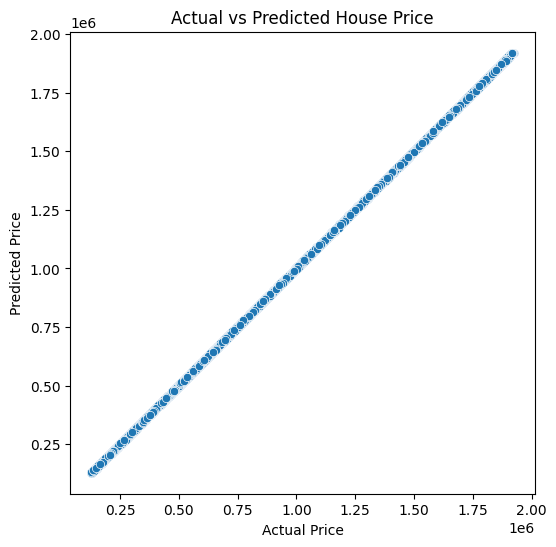

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [22]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_dt))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Linier Regresion  R² :  0.9999327579067112
Linier Regresion RMSE :  4213.796965927831


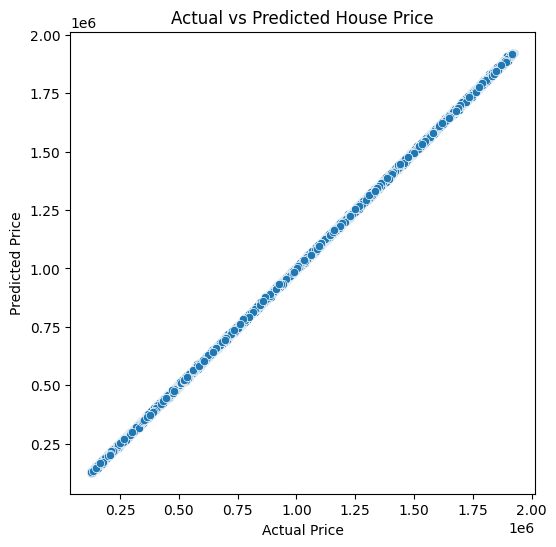

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [26]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_rf))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Linier Regresion  R² :  0.9999611500858506
Linier Regresion RMSE :  4213.796965927831


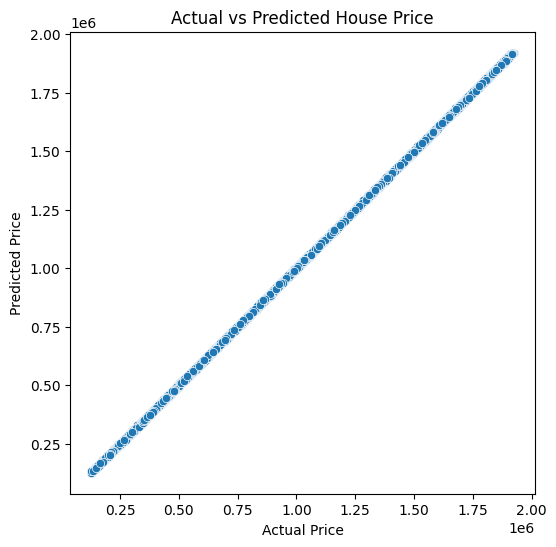

In [27]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

In [29]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_gb))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Linier Regresion  R² :  0.9999210512259065
Linier Regresion RMSE :  4213.796965927831


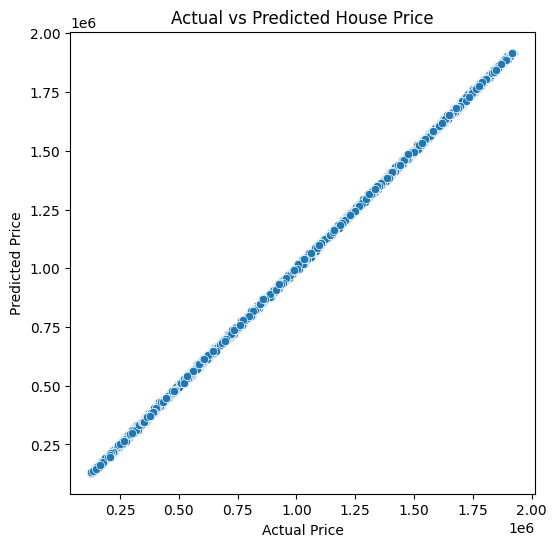

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [36]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [37]:
result

,metode,R²,RMSE
0,lr,0.999968,2894.056432
1,dt,0.999933,4213.796966
2,rf,0.999961,3202.934264
3,gb,0.999921,4565.892572
